In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('data.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

           Game Name  Positive Feedback  Negative Feedback  Total Feedback   
0           Portal 2             398010               5241          403251  \
1  People Playground             251951               3497          255448   
2     Stardew Valley             732976              12605          745581   
3  Vampire Survivors             230123               3476          233599   
4              Hades             261794               4476          266270   

   Rating  Year  Metacritic Score  
0    9770  2011              95.0  
1    9749  2019               NaN  
2    9748  2016              89.0  
3    9734  2022              88.0  
4    9719  2020              93.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Game Name          250 non-null    object 
 1   Positive Feedback  250 non-null    int64  
 2   Negative Feedb

In [2]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values with median for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# For categorical columns, you might want to fill with mode or a specific value
# df['categorical_column'] = df['categorical_column'].fillna(df['categorical_column'].mode()[0])

# Verify that missing values have been handled
print(df.isnull().sum())

Game Name              0
Positive Feedback      0
Negative Feedback      0
Total Feedback         0
Rating                 0
Year                   0
Metacritic Score     119
dtype: int64
Game Name            0
Positive Feedback    0
Negative Feedback    0
Total Feedback       0
Rating               0
Year                 0
Metacritic Score     0
dtype: int64


In [3]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to relevant numerical columns
for col in ['Positive Feedback', 'Negative Feedback', 'Total Feedback', 'Rating', 'Metacritic Score']:
    df = remove_outliers(df, col)

print(f"Shape after outlier removal: {df.shape}")

Shape after outlier removal: (152, 7)


In [4]:
# Create new features
df['Positive Feedback Ratio'] = df['Positive Feedback'] / df['Total Feedback']
df['Negative Feedback Ratio'] = df['Negative Feedback'] / df['Total Feedback']
df['Feedback Ratio'] = df['Positive Feedback'] / df['Negative Feedback']

# Display the new features
print(df[['Positive Feedback Ratio', 'Negative Feedback Ratio', 'Feedback Ratio']].head())

    Positive Feedback Ratio  Negative Feedback Ratio  Feedback Ratio
11                 0.986584                 0.013416       73.539088
12                 0.990511                 0.009489      104.380342
24                 0.990252                 0.009748      101.588608
25                 0.995705                 0.004295      231.820513
28                 0.980636                 0.019364       50.641975


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute summary statistics
summary_stats = df.describe()
print(summary_stats)

# For categorical variables (if any)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

       Positive Feedback  Negative Feedback  Total Feedback       Rating   
count         152.000000         152.000000      152.000000   152.000000  \
mean        20676.618421         552.664474    21229.282895  9504.526316   
std         20540.672333         689.265123    21202.653380    57.962302   
min          2413.000000          14.000000     2430.000000  9426.000000   
25%          6183.500000         101.000000     6309.500000  9458.750000   
50%         13913.500000         307.000000    14296.500000  9494.000000   
75%         24043.000000         704.000000    24482.750000  9544.000000   
max         94952.000000        4038.000000    97667.000000  9673.000000   

              Year  Metacritic Score  Positive Feedback Ratio   
count   152.000000        152.000000               152.000000  \
mean   2019.940789         86.664474                 0.978606   
std       3.711863          1.581952                 0.008233   
min    2007.000000         82.000000                 0.

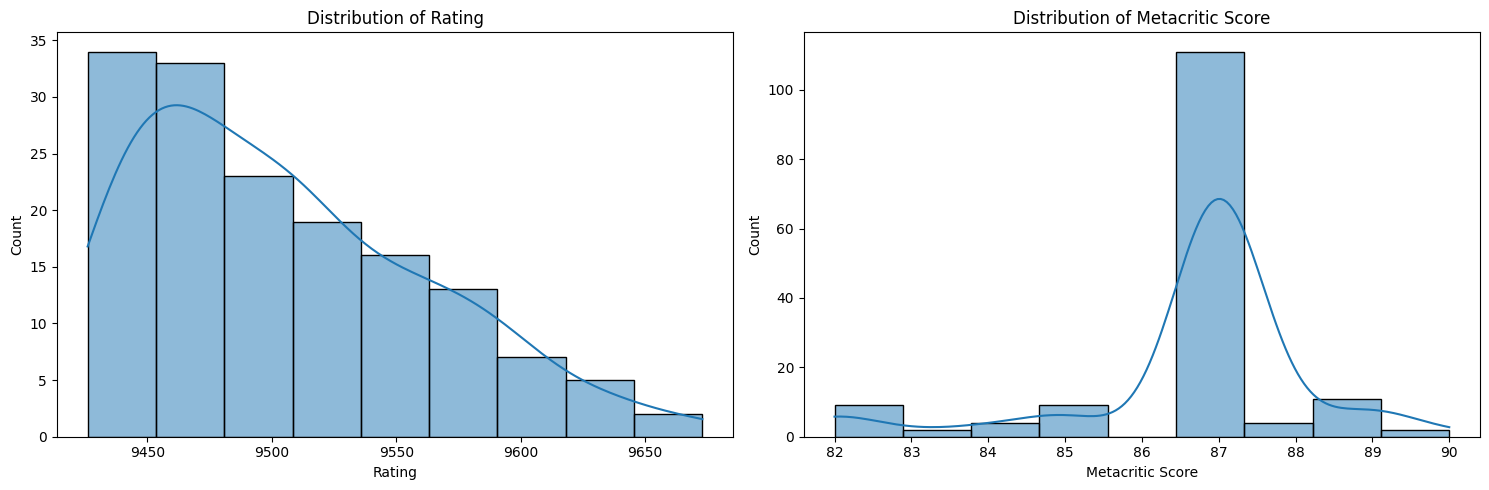

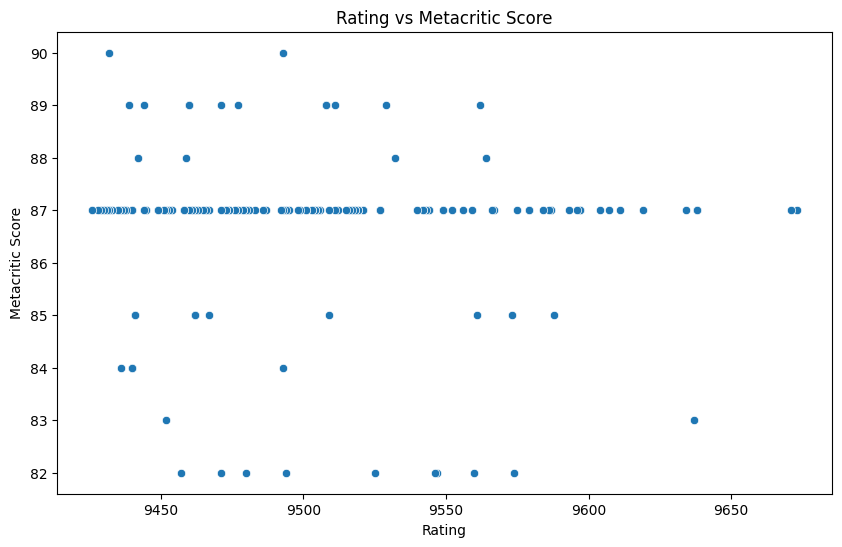

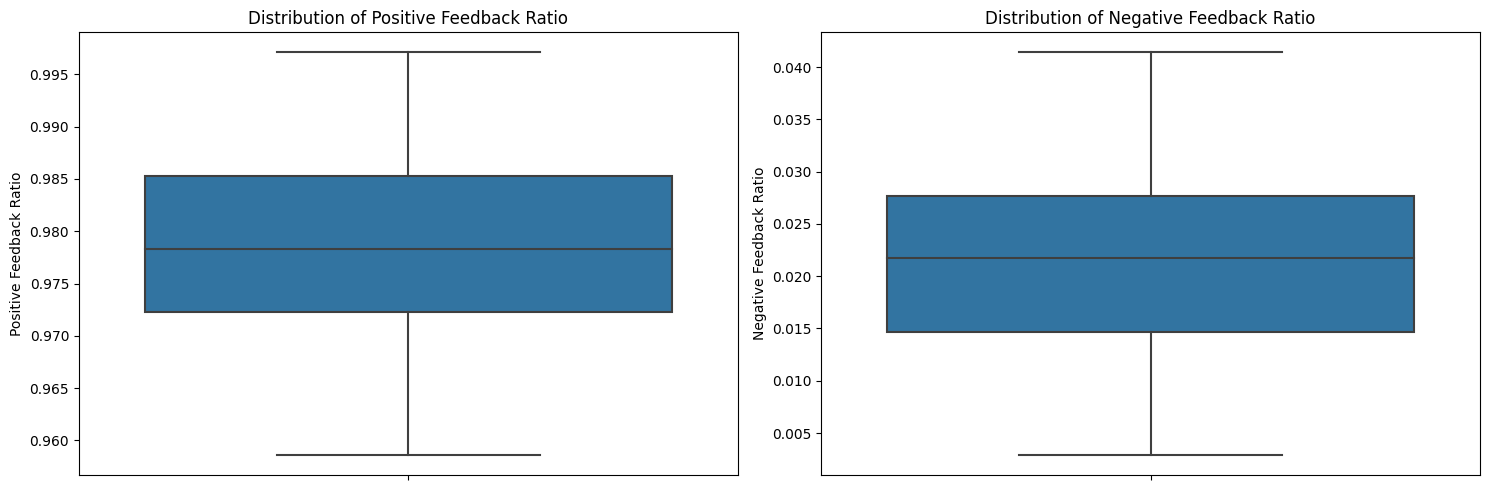

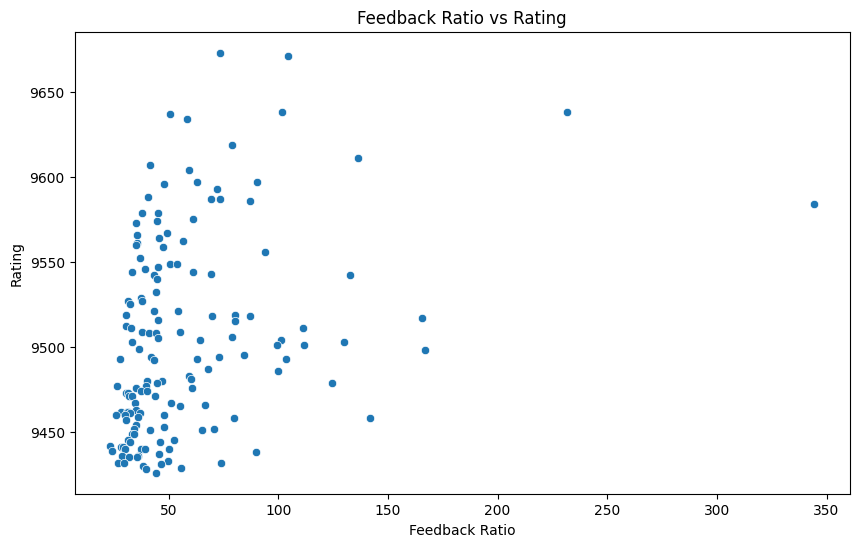

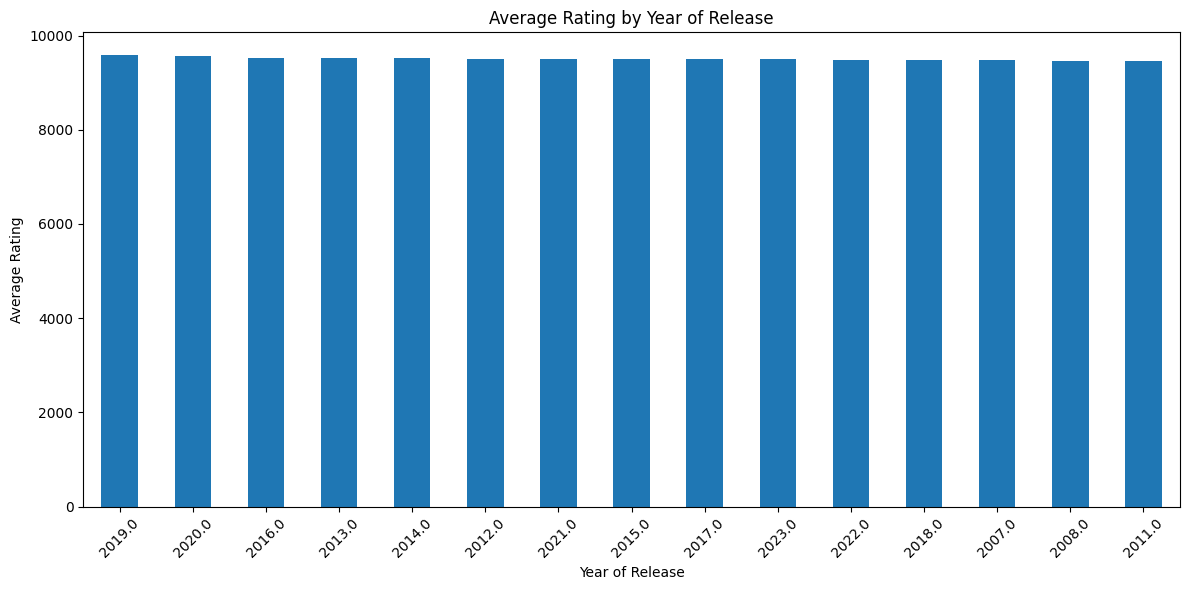

In [9]:
# Distribution of Rating and Metacritic Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['Rating'], kde=True, ax=ax1)
ax1.set_title('Distribution of Rating')

sns.histplot(df['Metacritic Score'], kde=True, ax=ax2)
ax2.set_title('Distribution of Metacritic Score')

plt.tight_layout()
plt.show()

# Scatter plot: Rating vs Metacritic Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Metacritic Score', data=df)
plt.title('Rating vs Metacritic Score')
plt.show()

# Box plots for feedback ratios
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(y='Positive Feedback Ratio', data=df, ax=ax1)
ax1.set_title('Distribution of Positive Feedback Ratio')

sns.boxplot(y='Negative Feedback Ratio', data=df, ax=ax2)
ax2.set_title('Distribution of Negative Feedback Ratio')

plt.tight_layout()
plt.show()

# Scatter plot: Feedback Ratio vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feedback Ratio', y='Rating', data=df)
plt.title('Feedback Ratio vs Rating')
plt.show()

# Bar plot: Average Rating by Year of Release
yearly_avg_rating = df.groupby('Year')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
yearly_avg_rating.plot(kind='bar')
plt.title('Average Rating by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


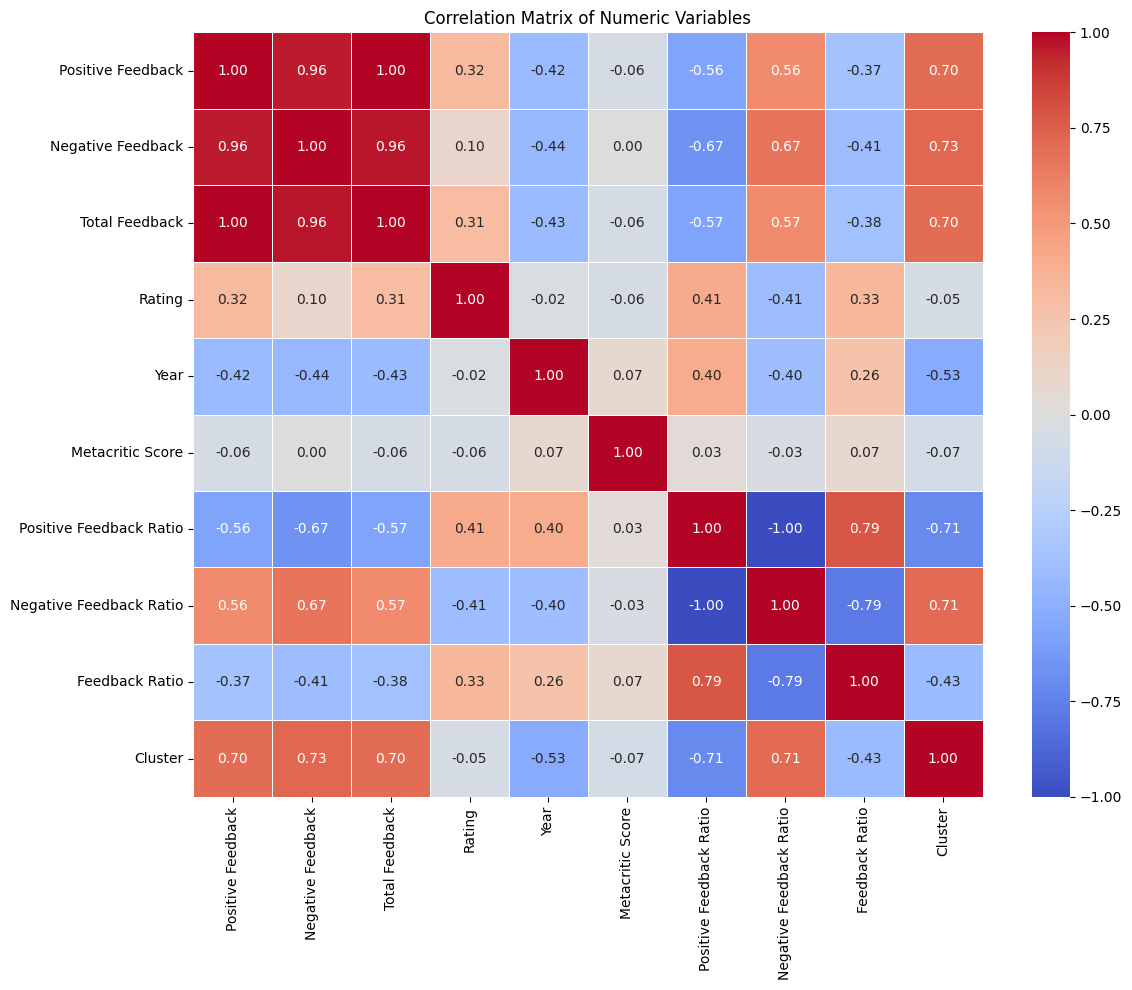

In [16]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your preprocessed dataframe
X = df.drop(['Rating', 'Metacritic Score', 'Game Name'], axis=1)  # Adjust as needed
y_rating = df['Rating']
y_metacritic = df['Metacritic Score']

# Split the data
X_train, X_test, y_rating_train, y_rating_test, y_metacritic_train, y_metacritic_test = train_test_split(
    X, y_rating, y_metacritic, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# List to store the results
results = []

# Run the models and store the results
for target, y_train, y_test in [('Rating', y_rating_train, y_rating_test), 
                                ('Metacritic Score', y_metacritic_train, y_metacritic_test)]:
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mae, mse, r2 = evaluate_model(y_test, y_pred)
        
        # Store the results in a dictionary
        results.append({
            'Target': target,
            'Model': name,
            'MAE': mae,
            'MSE': mse,
            'R2': r2
        })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Target,Model,MAE,MSE,R2
0,Rating,Linear Regression,50.958498,3327.255083,-0.146789
1,Rating,Ridge Regression,50.288474,3247.197442,-0.119196
2,Rating,Lasso Regression,48.692078,3132.102215,-0.079526
3,Rating,Decision Tree,80.967742,9420.000000,-2.246745
4,Rating,Random Forest,52.577419,3788.817948,-0.305873
5,Metacritic Score,Linear Regression,1.003663,3.409024,-1.002489
6,Metacritic Score,Ridge Regression,0.970639,2.933471,-0.723145
7,Metacritic Score,Lasso Regression,0.724873,1.702658,-0.000155
8,Metacritic Score,Decision Tree,1.645161,6.096774,-2.581296
9,Metacritic Score,Random Forest,0.899032,1.541358,0.094593


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create categorical labels based on rating
def categorize_rating(rating):
    if rating >= df['Rating'].quantile(0.66):
        return 'High'
    elif rating >= df['Rating'].quantile(0.33):
        return 'Medium'
    else:
        return 'Low'

y_category = y_rating.apply(categorize_rating)

# Check the distribution of categories
print("Category distribution:")
print(y_category.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(X, y_category, test_size=0.2, random_state=42, stratify=y_category)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classification_models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in classification_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

Category distribution:
Rating
High      0.342105
Medium    0.328947
Low       0.328947
Name: proportion, dtype: float64

Logistic Regression:
  Accuracy: 0.6129
  Precision: 0.6866
  Recall: 0.6129
  F1 Score: 0.6308

Decision Tree:
  Accuracy: 0.8065
  Precision: 0.8208
  Recall: 0.8065
  F1 Score: 0.8102

Random Forest:
  Accuracy: 0.7097
  Precision: 0.7573
  Recall: 0.7097
  F1 Score: 0.7156


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use only numerical features for clustering
X_cluster = df.select_dtypes(include=[np.number])
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Find the optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cluster_scaled)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, cluster_labels))

optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

print(f"Optimal number of clusters: {optimal_clusters}")
print("Cluster distribution:")
print(df['Cluster'].value_counts())

# Analyze clusters
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data[['Rating', 'Metacritic Score']].describe())

Optimal number of clusters: 2
Cluster distribution:
Cluster
0    102
1     50
Name: count, dtype: int64

Cluster 0:
            Rating  Metacritic Score
count   102.000000        102.000000
mean   9506.549020         86.745098
std      59.395241          1.216115
min    9426.000000         82.000000
25%    9458.500000         87.000000
50%    9496.500000         87.000000
75%    9542.750000         87.000000
max    9673.000000         89.000000

Cluster 1:
            Rating  Metacritic Score
count    50.000000         50.000000
mean   9500.400000         86.500000
std      55.278146          2.149988
min    9432.000000         82.000000
25%    9459.250000         85.000000
50%    9476.500000         87.000000
75%    9545.500000         87.750000
max    9637.000000         90.000000
